**Assignment 8**-Principal Component Analysis(PCA)

Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df

In [125]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn.cluster import KMeans
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Reading the input csv file

In [126]:
data=pd.read_csv("/content/wine.csv")
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Checking the shape

In [127]:
data.shape

(178, 14)

In [128]:
data.Type.unique()

array([1, 2, 3])

Drop the "Type" column as it contains 3 different values, which makes the total dataset into 3 cluster

In [129]:
d1=data.drop("Type",axis=1)                        ##new dataset

In [130]:
d1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [131]:
d1.shape

(178, 13)

Checking the statistics

In [132]:
d1.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [133]:
d1.info()                           ## checking null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [134]:
d1[d1.duplicated(keep = False)]                   ## check for duplicate values

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


Checking the presence of outliers sing Boxplot

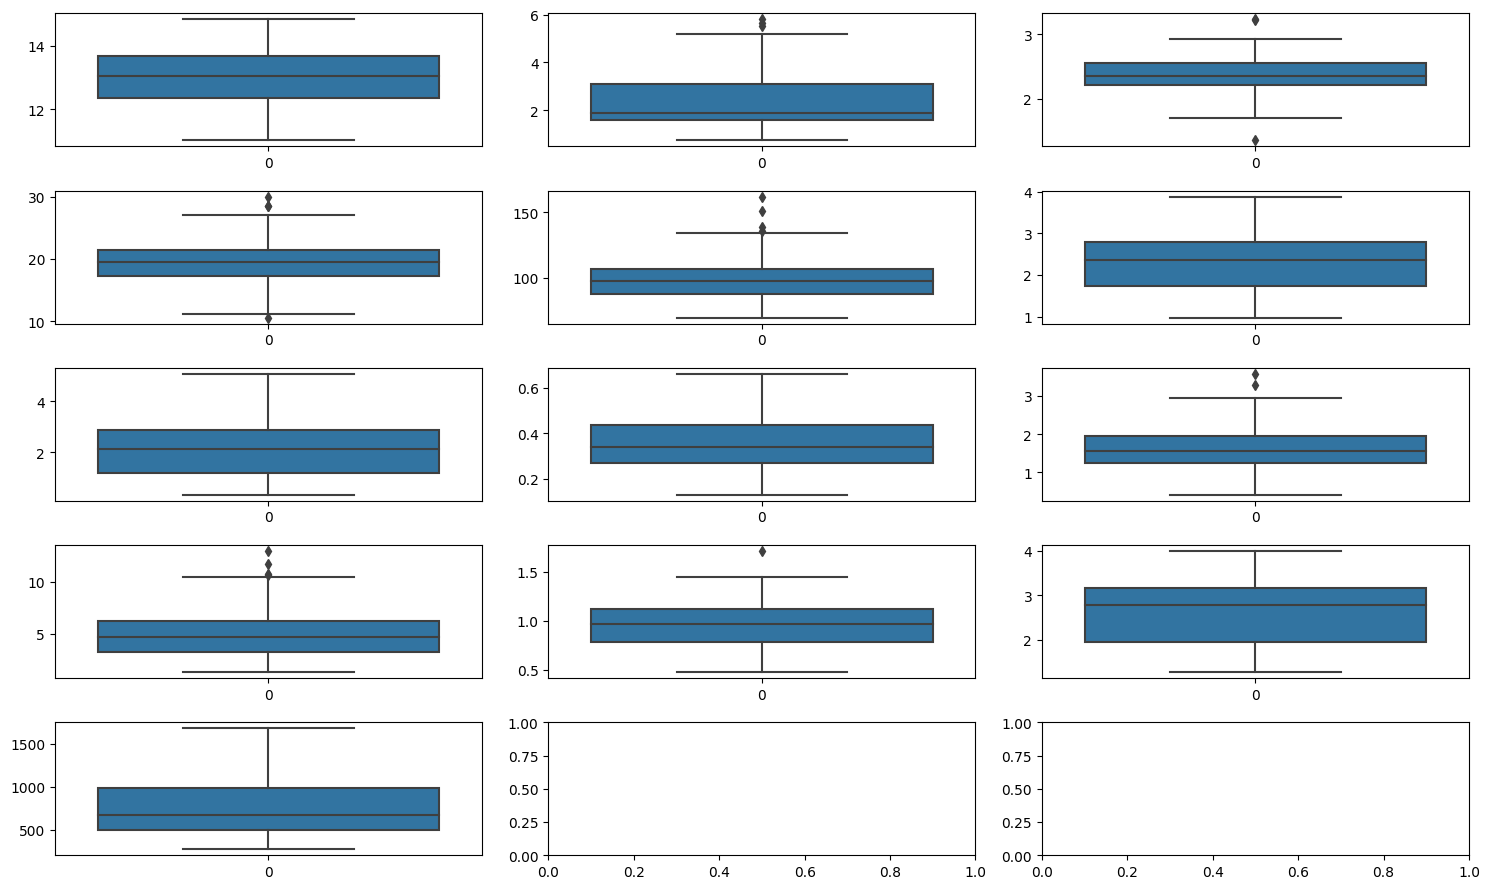

In [135]:
fig, ax = plt.subplots(5, 3, figsize=(15,9))
sns.boxplot(d1.Alcohol,ax=ax[0,0])
sns.boxplot(d1.Malic,ax=ax[0,1])
sns.boxplot(d1.Ash,ax=ax[0,2])
sns.boxplot(d1.Alcalinity,ax=ax[1,0])
sns.boxplot(d1.Magnesium,ax=ax[1,1])
sns.boxplot(d1.Phenols,ax=ax[1,2])
sns.boxplot(d1.Flavanoids,ax=ax[2,0])
sns.boxplot(d1.Nonflavanoids,ax=ax[2,1])
sns.boxplot(d1.Proanthocyanins,ax=ax[2,2])
sns.boxplot(d1.Color,ax=ax[3,0])
sns.boxplot(d1.Hue,ax=ax[3,1])
sns.boxplot(d1.Dilution,ax=ax[3,2])
sns.boxplot(d1.Proline, ax=ax[4,0])
plt.tight_layout()
plt.show()

Checking the distribution of data using distplot

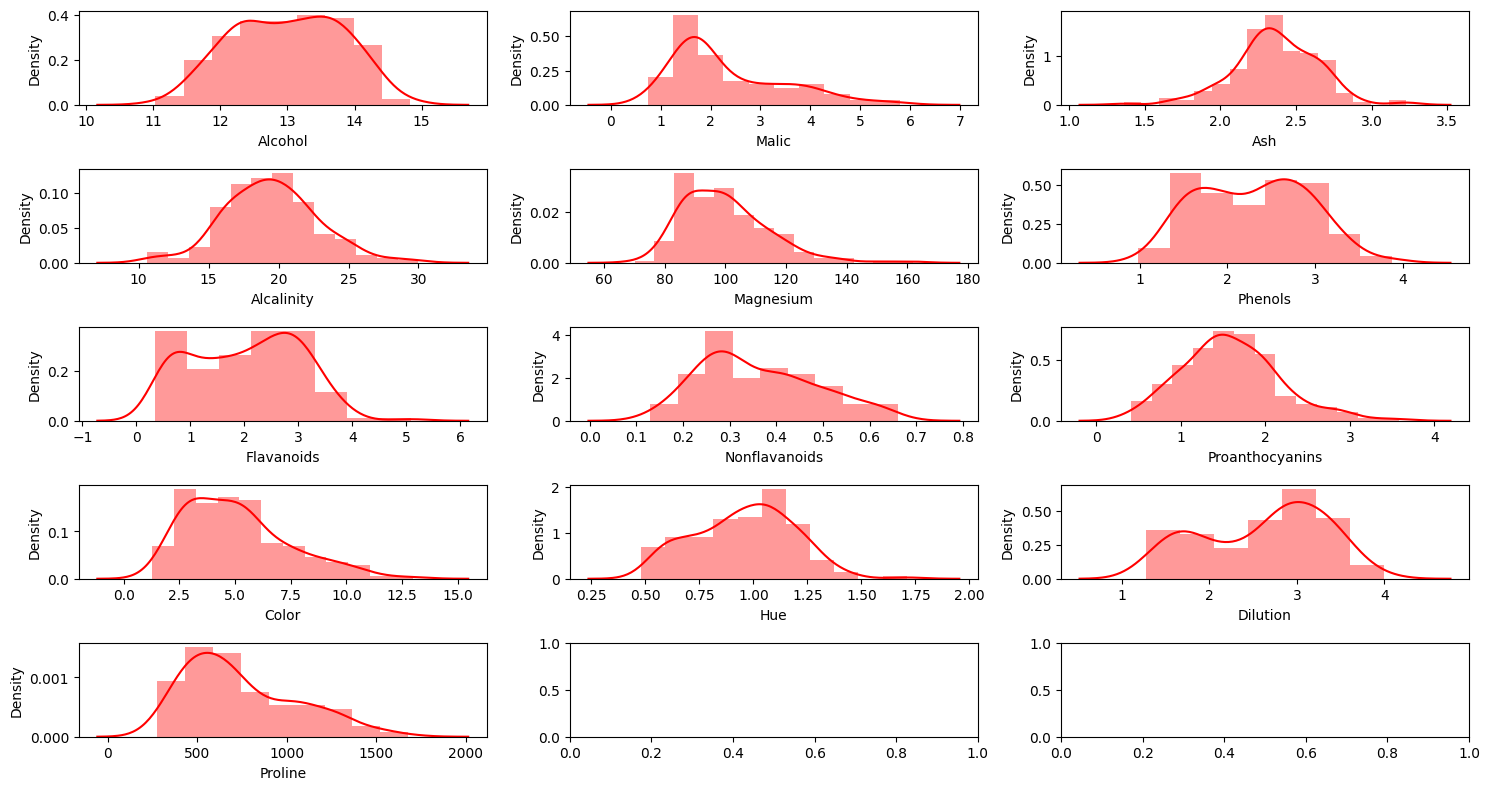

In [136]:
fig, ax = plt.subplots(5, 3, figsize=(15,8))
sns.distplot(d1.Alcohol,ax=ax[0,0],color='r')
sns.distplot(d1.Malic,ax=ax[0,1],color='r')
sns.distplot(d1.Ash,ax=ax[0,2],color='r')
sns.distplot(d1.Alcalinity,ax=ax[1,0],color='r')
sns.distplot(d1.Magnesium,ax=ax[1,1],color='r')
sns.distplot(d1.Phenols,ax=ax[1,2],color='r')
sns.distplot(d1.Flavanoids,ax=ax[2,0],color='r')
sns.distplot(d1.Nonflavanoids,ax=ax[2,1],color='r')
sns.distplot(d1.Proanthocyanins,ax=ax[2,2],color='r')
sns.distplot(d1.Color,ax=ax[3,0],color='r')
sns.distplot(d1.Hue,ax=ax[3,1],color='r')
sns.distplot(d1.Dilution,ax=ax[3,2],color='r')
sns.distplot(d1.Proline,ax=ax[4,0],color='r')
plt.tight_layout()
plt.show()

Normalizing the data,inorder to avoid variance in the data

In [137]:
dN= scale(d1)

In [138]:
dN

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

Applying different type of clustering methods on the dataset without performing PCA

**1) Hierarchical Clustering**

Applying average linkage method

Text(0.5, 1.0, 'Dendrogram')

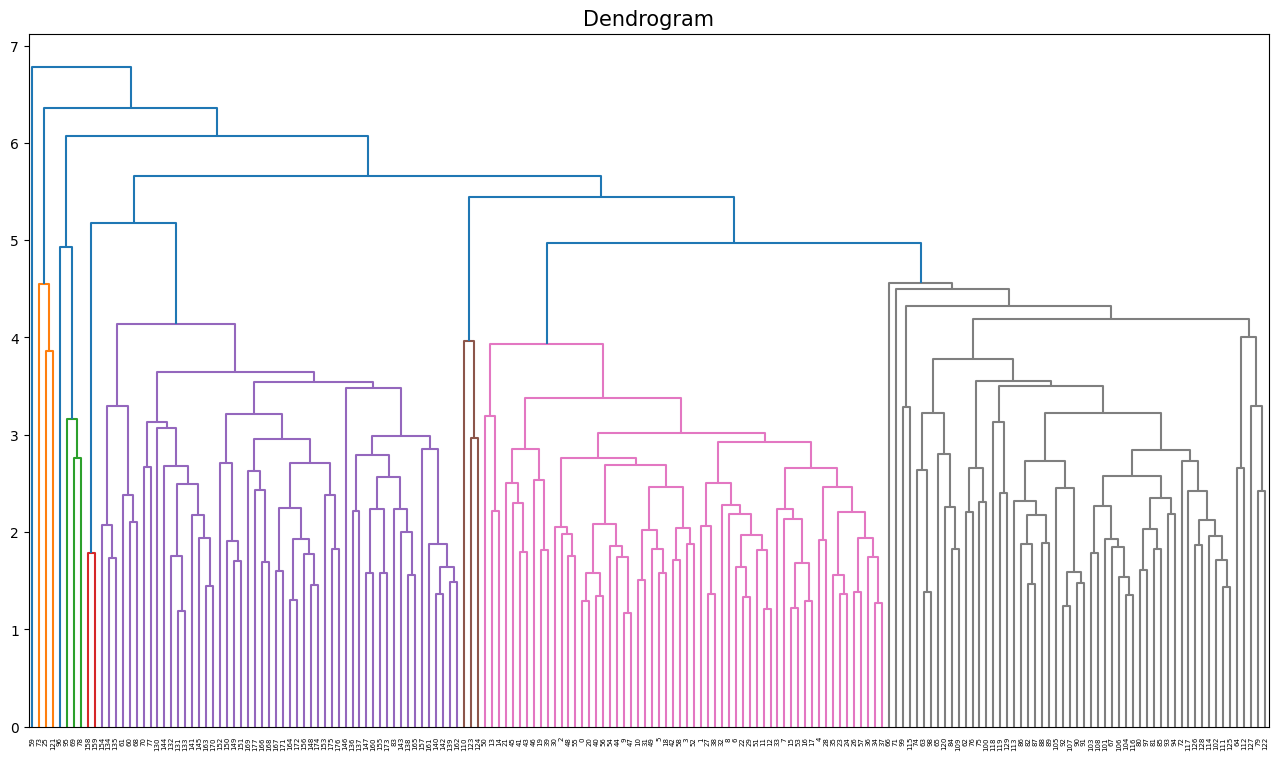

In [139]:
fig=plt.figure(figsize=(16,9))
dendrogram = sch.dendrogram(sch.linkage(dN, method='average'))
plt.title("Dendrogram",size=15)

In [140]:
A1=AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

Fitting the data on the model created (A1)

In [141]:
y_A1 = A1.fit_predict(dN)
Clusters=pd.DataFrame(y_A1,columns=['Clusters'])

Creating a new column in the datasst named cluster

In [142]:
data['cluster'] = y_A1

In [143]:
data.groupby('cluster').agg(['mean']).reset_index()           ## grouping the cluster with their mean values

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.500000,13.003879,1.996207,2.343017,18.665517,97.612069,2.568448,2.572069,0.322672,1.776379,4.27931,1.058879,3.017672,802.732759
1,1,2.888889,13.090185,3.181111,2.414815,21.087037,99.592593,1.697222,0.837778,0.455556,1.126852,6.99463,0.717148,1.710185,629.629630
2,2,1.666667,12.533333,1.923333,3.016667,27.833333,127.333333,3.036667,3.550000,0.383333,1.916667,4.31000,1.123333,3.463333,760.000000
3,3,2.000000,12.370000,0.940000,1.360000,10.600000,88.000000,1.980000,0.570000,0.280000,0.420000,1.95000,1.050000,1.820000,520.000000
4,4,2.000000,12.205000,1.455000,2.160000,18.025000,145.750000,1.962500,1.597500,0.237500,2.525000,2.83750,1.112500,2.567500,757.500000


Viewing how many wine categories are included in each cluster/group 

In [144]:
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(data[data['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 116

cluster 1
Total Members: 54

cluster 2
Total Members: 3

cluster 3
Total Members: 1

cluster 4
Total Members: 4



Applying complete linkage method

Text(0.5, 1.0, 'Dendrogram')

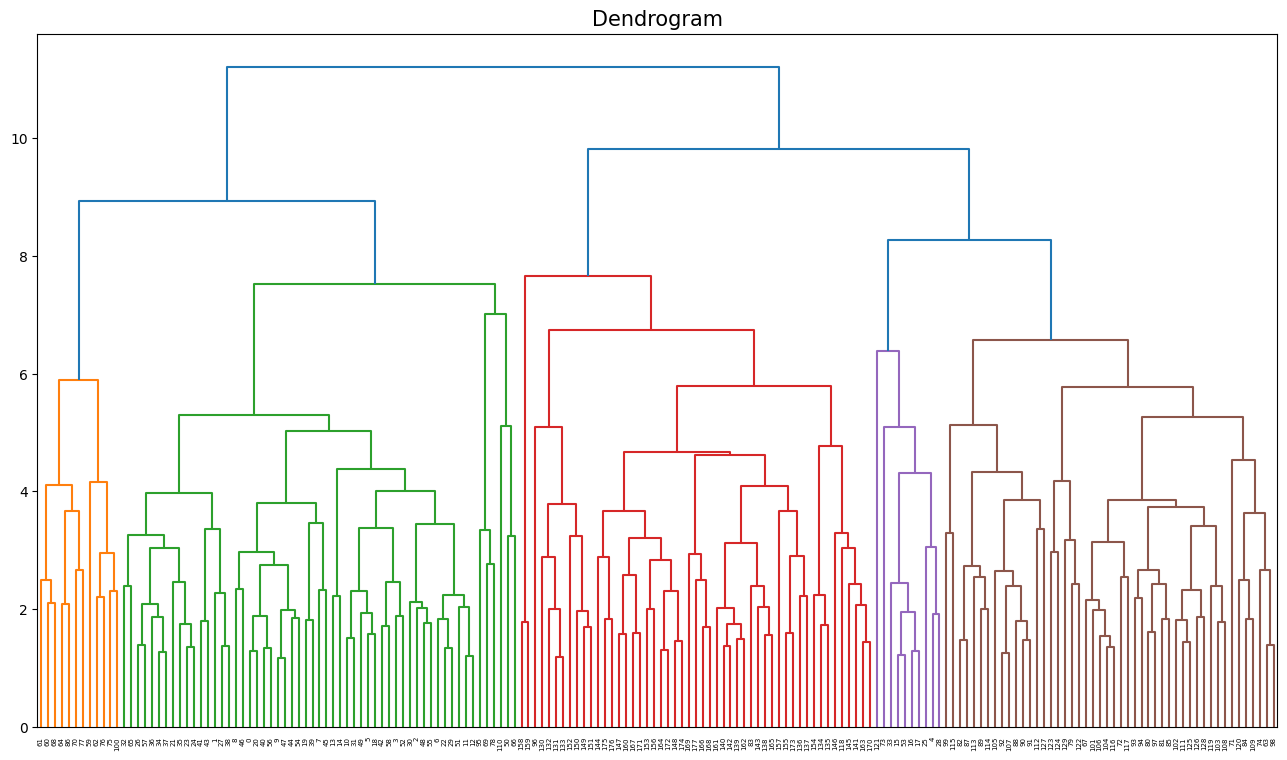

In [145]:
fig=plt.figure(figsize=(16,9))
dendrogram = sch.dendrogram(sch.linkage(dN, method='complete'))
plt.title("Dendrogram",size=15)

In [146]:
A2=AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

Fitting the data on the model and following the above steps 

In [147]:
y_A2 = A2.fit_predict(dN)
Clusters=pd.DataFrame(y_A2,columns=['Clusters'])

In [148]:
data['cluster'] = y_A2

In [149]:
data.groupby('cluster').agg(['mean']).reset_index()          ## grouping the cluster with their mean values

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.862069,12.415172,1.989828,2.381379,21.117241,93.844828,2.424828,2.339828,0.366897,1.678103,3.280345,1.057931,2.978448,573.379310
1,1,1.105263,13.604211,1.982807,2.360526,16.652632,106.368421,2.797719,2.920175,0.274386,2.015088,5.326667,1.051579,3.141228,1073.052632
2,2,2.941176,13.117843,3.322157,2.431765,21.333333,99.333333,1.675686,0.810588,0.444314,1.164314,7.170980,0.691373,1.709804,622.490196
3,3,2.000000,12.465000,1.500833,2.045833,17.341667,98.500000,1.913333,1.475833,0.402500,0.967500,3.395000,1.155500,2.156667,565.000000


In [150]:
for i in range(4):
    print("cluster", i)
    print("Total Members:", len(list(data[data['cluster'] == i]['Type'].values)))
    print()


cluster 0
Total Members: 58

cluster 1
Total Members: 57

cluster 2
Total Members: 51

cluster 3
Total Members: 12



Applying centroid linkage method

Text(0.5, 1.0, 'Dendrogram')

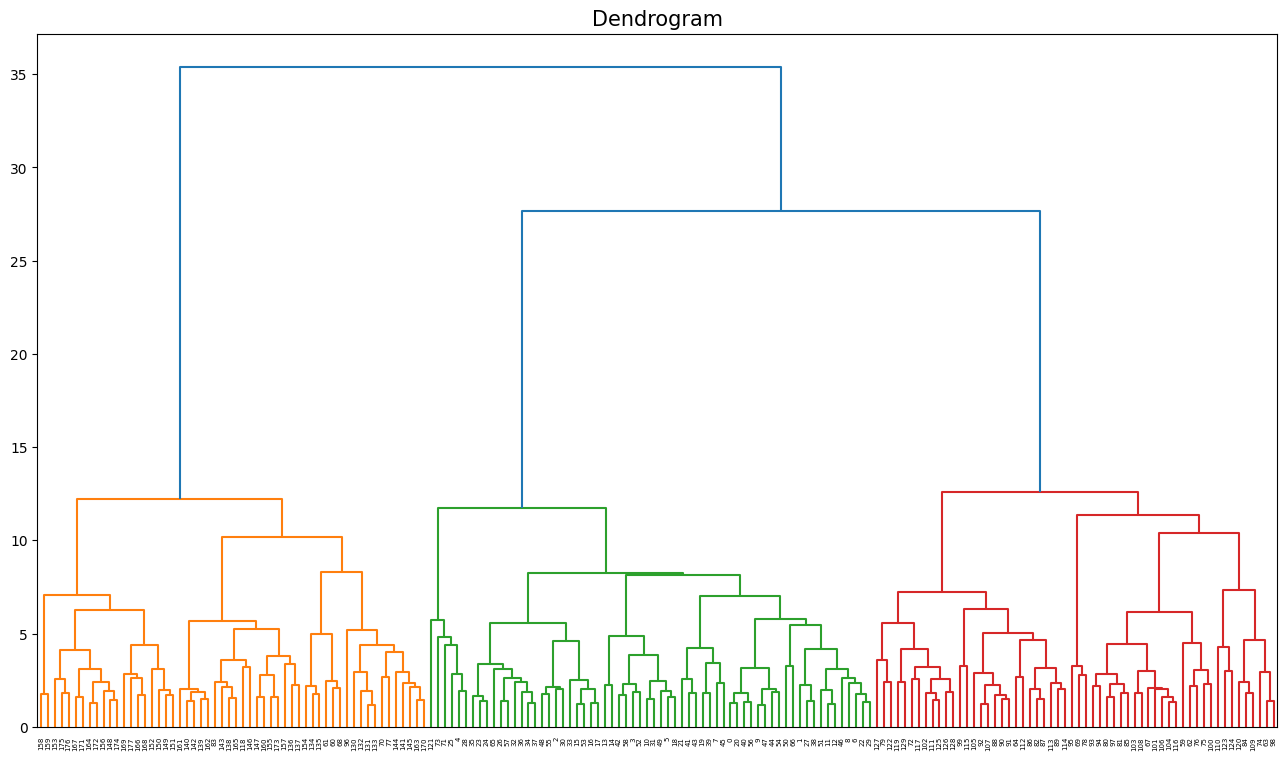

In [151]:
fig=plt.figure(figsize=(16,9))
dendrogram = sch.dendrogram(sch.linkage(dN, method='ward'))
plt.title("Dendrogram",size=15)

In [152]:
A3=AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

In [153]:
y_A3 = A3.fit_predict(dN)
Clusters=pd.DataFrame(y_A3,columns=['Clusters'])

In [154]:
data['cluster'] = y_A3

In [155]:
data.groupby('cluster').agg(['mean']).reset_index()           ## grouping the cluster with their mean values

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.000000,12.203966,1.938966,2.215172,20.208621,92.551724,2.262931,2.088103,0.355345,1.686552,2.895345,1.060000,2.862241,501.431034
1,1,2.857143,13.061607,3.166607,2.412857,21.003571,99.857143,1.694286,0.847857,0.449464,1.129286,6.850179,0.721000,1.727321,624.946429
2,2,1.078125,13.669219,1.970000,2.463125,17.528125,106.156250,2.850000,3.009688,0.291094,1.908125,5.450000,1.071406,3.158437,1076.046875


In [156]:
for i in range(3):
    print("cluster", i)
    print("Total Members:", len(list(data[data['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 58

cluster 1
Total Members: 56

cluster 2
Total Members: 64



Applying single linkage method

Text(0.5, 1.0, 'Dendrogram')

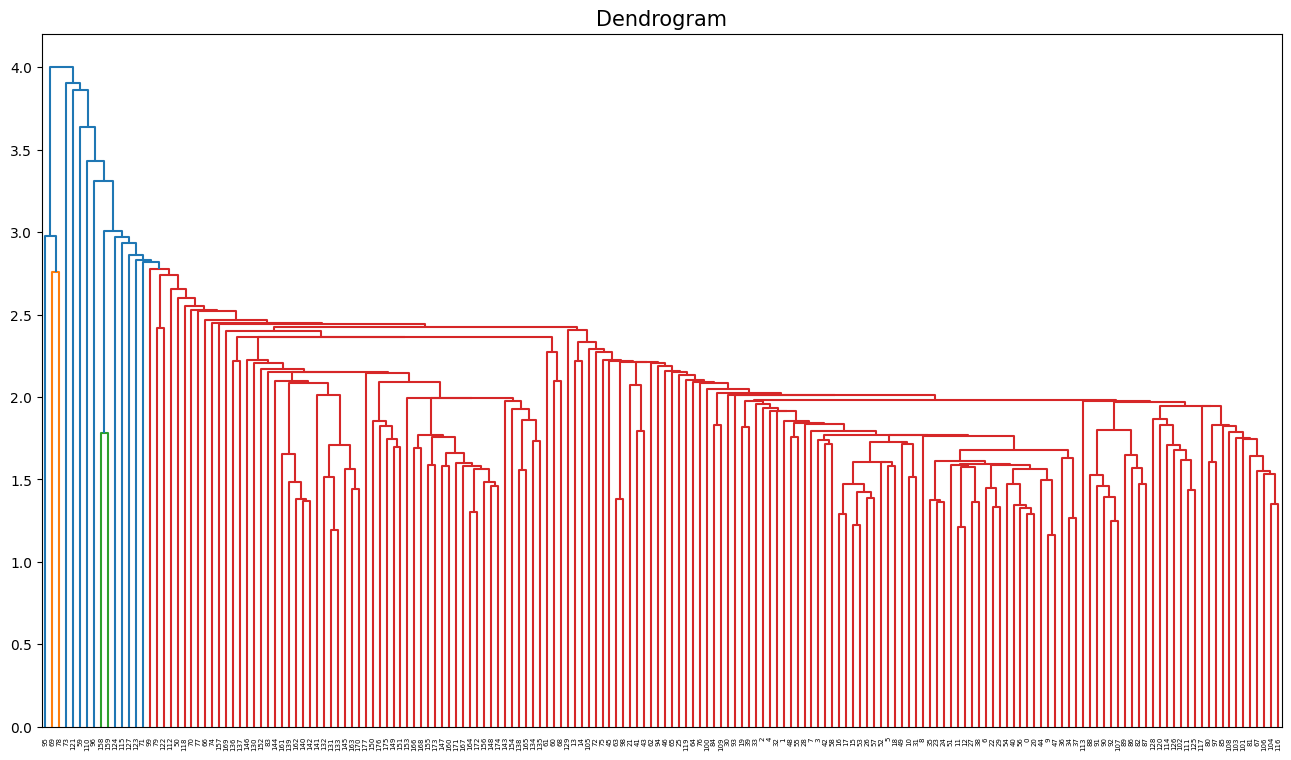

In [157]:
fig=plt.figure(figsize=(16,9))
dendrogram = sch.dendrogram(sch.linkage(dN, method='single'))
plt.title("Dendrogram",size=15)

Creating a hierarchial clustering with 2 categories

In [158]:
A4=AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'single')

In [159]:
y_A4 = A4.fit_predict(dN)
Clusters=pd.DataFrame(y_A4,columns=['Clusters'])

In [160]:
data['cluster'] = y_A4

In [161]:
data.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.937143,13.012000,2.355257,2.373371,19.540000,98.885714,2.298743,2.0332,0.363429,1.569371,5.094229,0.953863,2.610686,745.954286
1,1,2.000000,12.336667,1.233333,1.966667,16.866667,149.666667,2.083333,1.8000,0.270000,2.846667,2.950000,1.166667,2.670000,801.666667


### Viewing the number of categories in the two clusters

In [162]:
for i in range(2):
    print("cluster", i)
    print("Total Members:", len(list(data[data['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 175

cluster 1
Total Members: 3



2) K-Means clustering 

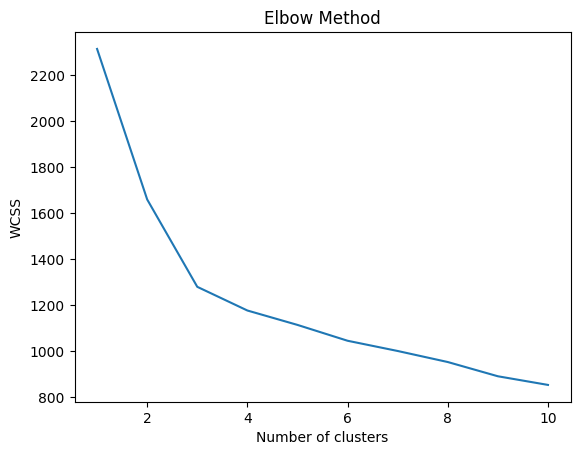

In [163]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(dN)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [164]:
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(dN)

KMeans(n_clusters=3, random_state=42)

Creating a variable with cluster labels for all the categories

In [165]:
KM_label=clusters_new.labels_

In [166]:
data['cluster'] = clusters_new.labels_

In [167]:
clusters_new.cluster_centers_

array([[ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618]])

In [168]:
data.groupby('cluster').agg(['mean']).reset_index()            ## grouping the cluster with their mean values

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,1,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
2,2,2.000000,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231


In [169]:
for i in range(3):
    print("cluster", i)
    print("Total Members:", len(list(data[data['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 51

cluster 1
Total Members: 62

cluster 2
Total Members: 65



Calculating the Silhouette score of all clustering models

In [170]:
S1=metrics.silhouette_score(dN,y_A1)
S1

0.22945756295901437

In [171]:
S2=metrics.silhouette_score(dN,y_A2)
S2

0.19382526203175696

In [172]:
S3=metrics.silhouette_score(dN,y_A3)
S3

0.2774439826952265

In [173]:
S4=metrics.silhouette_score(dN,y_A4)
S4

0.2224506072765093

In [174]:
SK=metrics.silhouette_score(dN,KM_label)
SK

0.2848589191898987

Consolidating the results

In [175]:
p={'Model':pd.Series(['Hierarchial1','Hierarchial2','Hierarchial3','Hierarchial4','Kmeans']),
  'Silhouette score':[S1,S2,S3,S4,SK]
  }
p=pd.DataFrame(t)
p

,Model,Silhouette score,Model_PCA,PCA Silhouette score
0,S_average,0.229458,S_ward_PCA,0.445949
1,S_Ward,0.193825,S_average_PCA,0.446545
2,S_Complete,0.277444,S_complete_PCA,0.357848
3,S_Single,0.222451,S_single_PCA,0.363107
4,S_Kmeans,0.284859,S_Kmeans_PCA,0.453800


**Perform the PCA on the normalized data**

In [176]:
pca = PCA()
pca_values = pca.fit_transform(dN)

In [177]:
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

### Applying PCA on the dataset

In [178]:
pca = PCA(n_components = 13)
pca_values = pca.fit_transform(dN)

In [179]:
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

Cumulative variance 

In [180]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [181]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

Plotting the cumulative variance

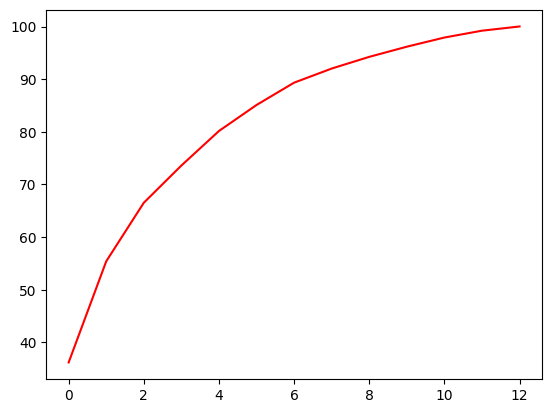

In [182]:
plt.plot(var1,color="red")

Considering PCs with three components

In [183]:
w_pca=pca_values[:,0:3]

Creating the cluster by using first 3 PCs

Applying centroid linkage method 

Text(0.5, 1.0, 'Dendrogram')

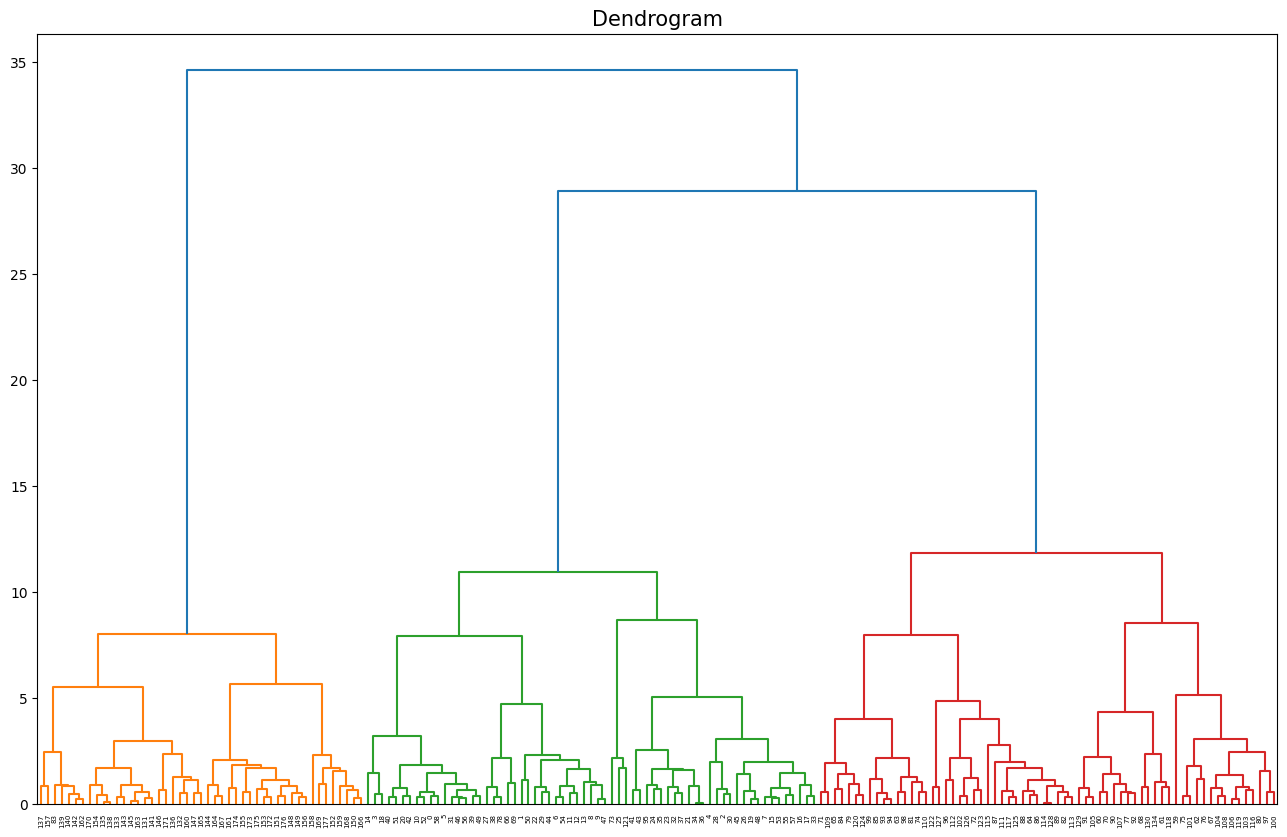

In [184]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(w_pca, method='ward'))
plt.title("Dendrogram",size=15)

In [185]:
A1_pc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

In [186]:
y_Ap = A1_pc.fit_predict(w_pca)
Clusters=pd.DataFrame(y_Ap,columns=['Clusters'])

In [187]:
data['cluster'] = y_Ap

In [188]:
data.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.030303,12.264242,1.932121,2.245455,20.087879,91.666667,2.220152,1.991364,0.367727,1.540455,3.036364,1.042515,2.729848,504.439394
1,1,2.978723,13.171489,3.431702,2.441064,21.595745,98.829787,1.674894,0.792979,0.452766,1.165957,7.452553,0.682979,1.702553,627.021277
2,2,1.092308,13.624769,1.954769,2.435538,17.373846,108.600000,2.819692,2.961692,0.290154,1.949385,5.379538,1.069538,3.149077,1079.753846


Viewing the number of wine categories in each cluster

In [189]:
for i in range(3):
    print("cluster", i)
    print("Total Members:", len(list(data[data['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 66

cluster 1
Total Members: 47

cluster 2
Total Members: 65



Applying average linkage method

Text(0.5, 1.0, 'Dendrogram')

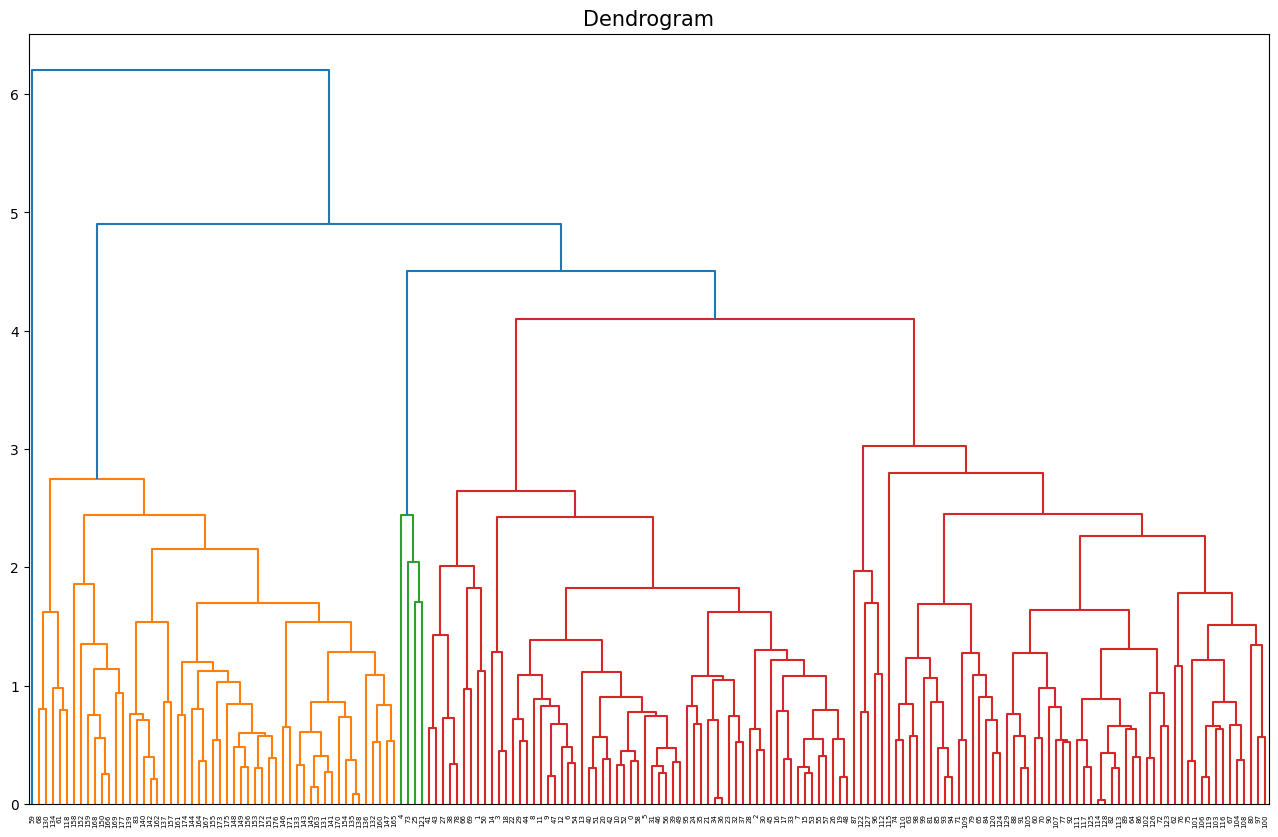

In [190]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(w_pca, method='average'))
plt.title("Dendrogram",size=15)

In [191]:
A2_pc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [192]:
y_Bp = A2_pc.fit_predict(w_pca)
Clusters=pd.DataFrame(y_Bp,columns=['Clusters'])

In [193]:
data['cluster'] = y_Bp

In [194]:
data.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.000000,12.215833,1.971000,2.265167,20.498333,91.083333,2.247667,2.084500,0.361167,1.619833,2.943000,1.059100,2.831833,498.683333
1,1,1.065574,13.684754,1.945902,2.399836,16.800000,107.524590,2.809344,2.937213,0.283934,1.953115,5.449508,1.067377,3.137213,1101.131148
2,2,2.923077,13.138077,3.261731,2.416538,21.159615,98.884615,1.700192,0.828077,0.453846,1.131923,7.156538,0.698269,1.701154,621.576923
3,3,2.000000,12.370000,0.940000,1.360000,10.600000,88.000000,1.980000,0.570000,0.280000,0.420000,1.950000,1.050000,1.820000,520.000000
4,4,1.500000,12.710000,2.090000,2.980000,26.125000,125.000000,2.977500,3.335000,0.385000,1.892500,4.312500,1.102500,3.330000,753.750000


In [195]:
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(data[data['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 60

cluster 1
Total Members: 61

cluster 2
Total Members: 52

cluster 3
Total Members: 1

cluster 4
Total Members: 4



Applying complete linkage method

Text(0.5, 1.0, 'Dendrogram')

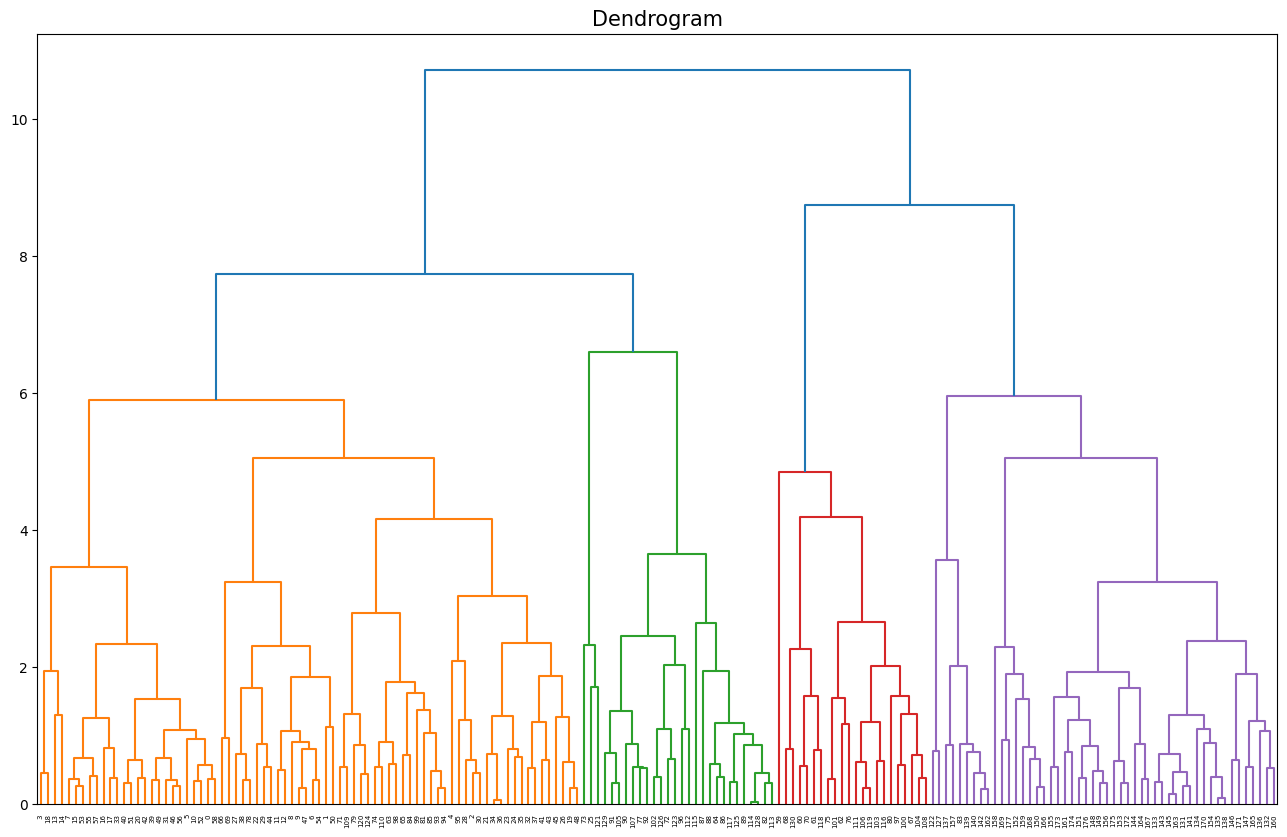

In [196]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(w_pca, method='complete'))
plt.title("Dendrogram",size=15)

In [197]:
A3_pc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [198]:
y_Cp = A3_pc.fit_predict(w_pca)
Clusters=pd.DataFrame(y_Cp,columns=['Clusters'])

In [199]:
data['cluster'] = y_Cp

In [200]:
data.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.964286,12.193929,2.023571,2.449286,22.453571,94.321429,2.129643,2.066786,0.422857,1.504643,2.934643,1.050000,2.814643,503.571429
1,1,2.940000,13.115600,3.381800,2.449800,21.750000,98.480000,1.701000,0.844400,0.457800,1.190400,7.216000,0.694800,1.741800,619.020000
2,2,2.045455,12.429091,1.612727,1.984545,17.918182,91.772727,2.021818,1.668636,0.349545,1.211818,3.138636,1.044364,2.534091,522.863636
3,3,1.256410,13.377692,1.982564,2.391154,17.432051,104.743590,2.812436,2.877051,0.281923,1.985513,4.978462,1.068077,3.118333,979.397436


Viewing the number of categories in each cluster

In [201]:
for i in range(4):
    print("cluster", i)
    print("Total Members:", len(list(data[data['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 28

cluster 1
Total Members: 50

cluster 2
Total Members: 22

cluster 3
Total Members: 78



Applying single linkage method

Text(0.5, 1.0, 'Dendrogram')

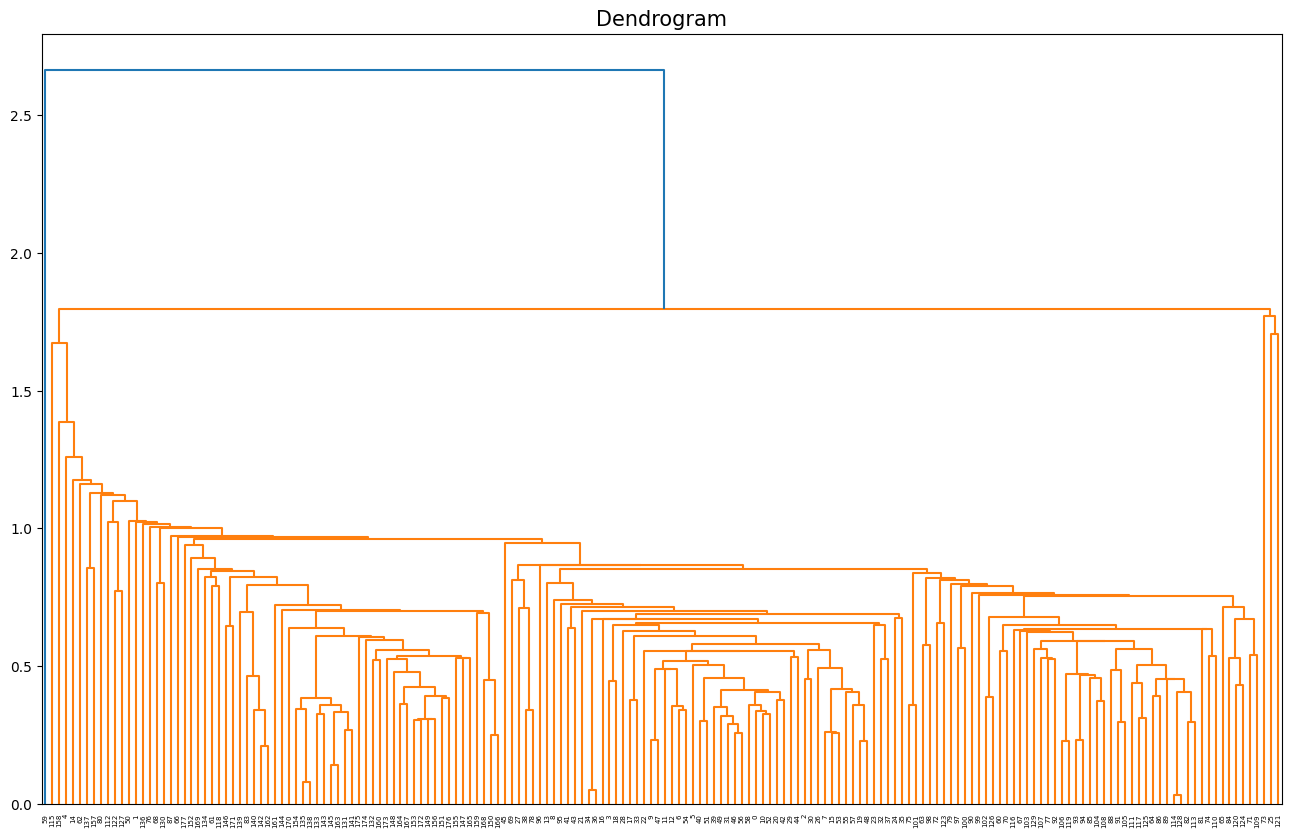

In [202]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(w_pca, method='single'))
plt.title("Dendrogram",size=15)

In [203]:
A4_pc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'single')

In [204]:
y_Dp = A4_pc.fit_predict(w_pca)
Clusters=pd.DataFrame(y_Dp,columns=['Clusters'])

In [205]:
data['cluster'] = y_Dp

### Viewing the numebr of wine categories in each cluster

In [206]:
for i in range(2):
    print("cluster", i)
    print("Total Members:", len(list(data[data['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 177

cluster 1
Total Members: 1



Applying K-Means clustering 

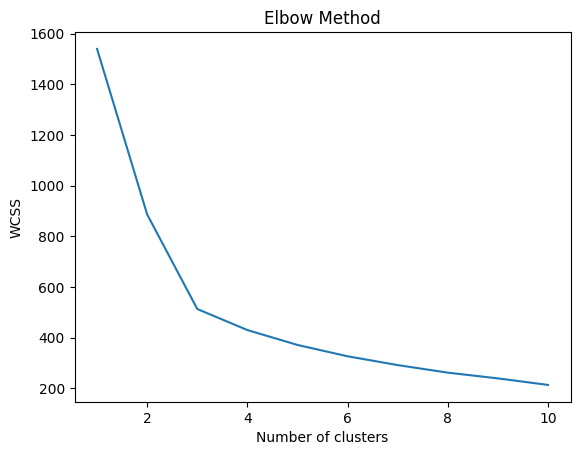

In [207]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(w_pca)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Creating a Kmeans model with three clusters and fitting it on the pca dataset

In [208]:
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(w_pca)

KMeans(n_clusters=3, random_state=42)

In [209]:
K_pca_label=clusters_new.labels_

In [210]:
data['cluster'] = clusters_new.labels_

In [211]:
clusters_new.cluster_centers_

array([[-2.72003575e+00, -1.12565126e+00, -2.39093241e-01],
       [ 2.27619360e+00, -9.32054027e-01,  1.52803156e-03],
       [-3.69566084e-02,  1.77223945e+00,  1.86138728e-01]])

In [212]:
data.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,1,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
2,2,2.000000,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231


Viewing the number of wine categories in each cluster

In [213]:
for i in range(3):
    print("cluster", i)
    print("Total Members:", len(list(data[data['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 51

cluster 1
Total Members: 62

cluster 2
Total Members: 65



Calculating the Silhouette score on the PCA clusters

In [214]:
S_ward_PCA=metrics.silhouette_score(w_pca,y_Ap)
S_ward_PCA

0.44594921980629704

In [215]:
S_average_PCA=metrics.silhouette_score(w_pca,y_Bp)
S_average_PCA

0.4465449278023582

In [216]:
S_complete_PCA=metrics.silhouette_score(w_pca,y_Cp)
S_complete_PCA

0.35784842685673074

In [217]:
S_single_PCA=metrics.silhouette_score(w_pca,y_Dp)
S_single_PCA

0.36310673051041403

In [218]:
S_kmeans_PCA=metrics.silhouette_score(w_pca,K_pca_label)
S_kmeans_PCA

0.45379998482576156

Consolidating the results

In [219]:
t={'Model':pd.Series(['S_average','S_Ward','S_Complete','S_Single','S_Kmeans']),
  'Silhouette score':[S1,S2,S3,S4,SK],
   'Model_PCA':['S_ward_PCA','S_average_PCA','S_complete_PCA','S_single_PCA','S_Kmeans_PCA'],
   'PCA Silhouette score ':[S_ward_PCA,S_average_PCA,S_complete_PCA,S_single_PCA,S_kmeans_PCA]
  }
t=pd.DataFrame(t)
t

,Model,Silhouette score,Model_PCA,PCA Silhouette score
0,S_average,0.229458,S_ward_PCA,0.445949
1,S_Ward,0.193825,S_average_PCA,0.446545
2,S_Complete,0.277444,S_complete_PCA,0.357848
3,S_Single,0.222451,S_single_PCA,0.363107
4,S_Kmeans,0.284859,S_Kmeans_PCA,0.453800


**Conclusion**:
Before performing PCA the cluster result is similar. But, after performing PCA, there is a double silhohuette score, which means that the complexity or overlaping of data is decreased after performing PCA.
In both the cases(before PCA and after PCA) 3 clusters are good enough , when clustering is done using centroid linkage method and kmeans clustering.
